<a href="https://colab.research.google.com/github/chayaphon/DADS6003/blob/main/Classification/Logistic_Regression/stock_prediction.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
### Import Data

st = yf.Ticker('ptt.bk') # PPT Stock
interval = '1h'
start = '2023-01-01'
end = '2023-12-31'
df = st.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,33.50,33.50,32.75,32.75,16197181,0.0,0.0
2023-01-03 11:00:00+07:00,33.00,33.25,32.75,33.00,8403871,0.0,0.0
2023-01-03 12:00:00+07:00,33.00,33.00,32.75,33.00,537021,0.0,0.0
2023-01-03 14:00:00+07:00,33.00,33.00,32.75,32.75,1552485,0.0,0.0
2023-01-03 15:00:00+07:00,33.00,33.00,32.75,32.75,1757109,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.00,35.50,35.75,28387917,0.0,0.0
2023-12-28 12:00:00+07:00,35.75,36.00,35.75,35.75,484119,0.0,0.0
2023-12-28 14:00:00+07:00,35.75,36.00,35.75,35.75,1401463,0.0,0.0


# Part 1 : Standard Features

In [26]:
df1 = df.copy()
df1 = df1.dropna()

In [27]:
### Define Target/Dependent Variable
X = df1.iloc[:,:4]
y = np.where(df1['Close'].shift(-1) > df1['Close'],1,-1)

### Split dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.10698457090105282]
1,High,[3.0244248350359633]
2,Low,[2.412441017648107]
3,Close,[-5.581754512524884]


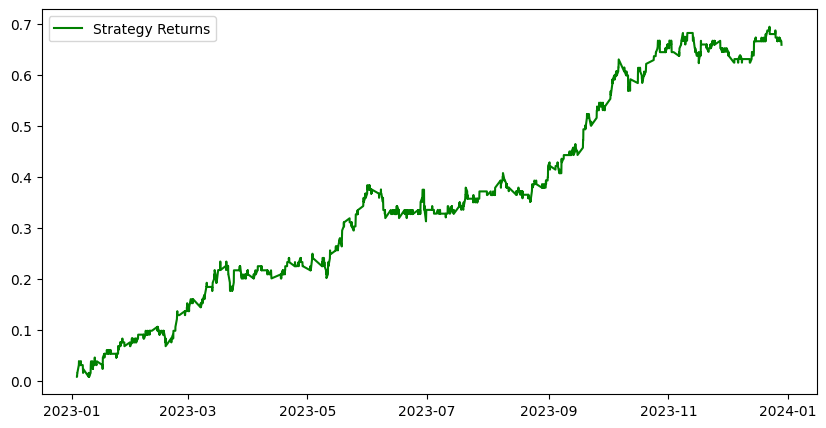

In [28]:
df1['Predicted_Signal'] = model.predict(X)
df1['Stock_returns'] = np.log(df1['Close']/df1['Close'].shift(1))
df1['Strategy_returns'] = df1['Stock_returns']* df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df1['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

# Part 2 : Additional Feature

In [29]:
df2 = df.copy()
df2 = df2.dropna()

In [30]:
### Add feature

# Technical Indicators
import talib as ta

df2 = df2.iloc[:,:4]
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
df2

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,32.25,32.50,32.25,32.25,32.225,0.088764,39.615530,0.00,0.00
2023-01-06 11:00:00+07:00,32.50,32.75,32.25,32.50,32.250,-0.053361,53.195895,0.25,0.25
2023-01-06 12:00:00+07:00,32.50,32.75,32.50,32.50,32.275,-0.018559,53.195895,0.00,0.00
2023-01-06 14:00:00+07:00,32.75,32.75,32.50,32.75,32.325,0.357534,63.367102,0.25,0.25
2023-01-06 15:00:00+07:00,32.75,32.75,32.50,32.50,32.350,0.576215,51.042384,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,35.50,36.00,35.50,35.75,35.625,0.394665,59.488657,-0.25,0.00
2023-12-28 12:00:00+07:00,35.75,36.00,35.75,35.75,35.650,0.329276,59.488657,0.00,0.25
2023-12-28 14:00:00+07:00,35.75,36.00,35.75,35.75,35.650,0.757282,59.488657,0.00,0.00


In [31]:
### Define Target/Dependent Variable
X = df2.iloc[:,:9]
y = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)

### Split dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.1307228515264337]
1,High,[3.4029218466806186]
2,Low,[2.144386408952332]
3,Close,[-3.953125765467299]
4,S_10,[-1.6951914516157418]
5,Corr,[-0.12851693975427694]
6,RSI,[-0.04764669178148913]
7,Open-Close,[-0.19459757971502223]
8,Open-Open,[0.4110387249364355]


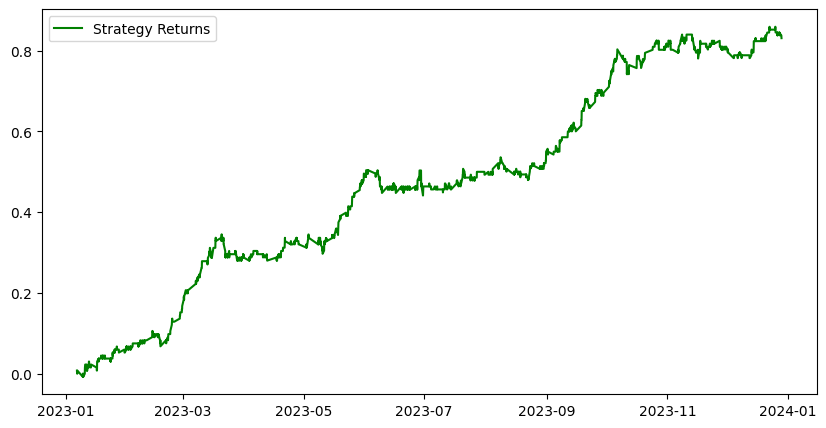

In [32]:
df2['Predicted_Signal'] = model.predict(X)
df2['Stock_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
df2['Strategy_returns'] = df2['Stock_returns']* df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(df2['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

### Plot two graps of Srategy Returns (before and after adding new feature)

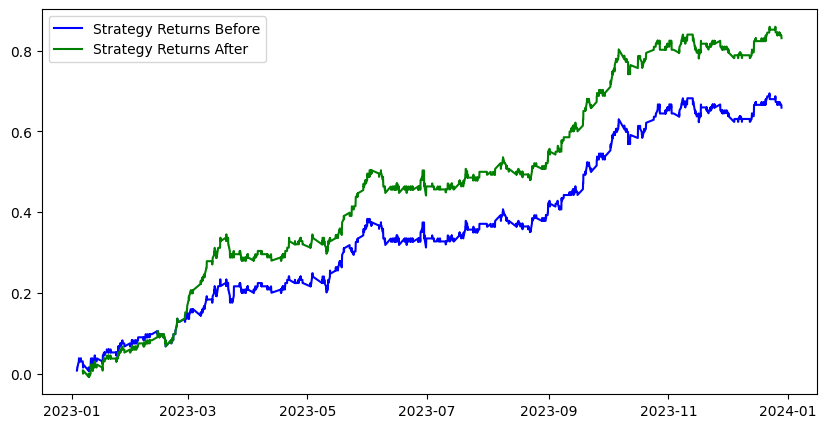

In [35]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns1, color='b', label = 'Strategy Returns Before')
plt.plot(Cumulative_Strategy_returns2, color='g', label = 'Strategy Returns After')
plt.legend()
plt.show()